In [1]:
# import necessary functions
import os
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import custom functions for data selection (eda_subfolder identical to eda, filepaths adjusted for use in eda folder)
from eda.eda import *
print(os.getcwd())
from sklearn.preprocessing import OneHotEncoder


C:\Users\samjd\Documents\flatiron\project_phase2\phase_2_project_chicago-sf-seattle-ds-082420


In [2]:
# NOTE: Year = year for analysis; create: False(read merged file created before)/True(create a merged file)
# Returns df_merged with selected columns from each file
df_merged = consolidate_data(year=2019, create=False)

In [3]:
df_merged.Address

0              27033  NE DOROTHY ST   98019
1                22848  SE 264TH CT   98038
2                10322   12TH AVE NW  98177
3                     26034   231ST PL SE  
4                 8013   11TH AVE NW  98117
                        ...                
30194    19422   NORMANDY PARK DR SW  98166
30195           15221   285TH AVE NE  98019
30196             20318   5TH AVE NE  98155
30197             16723   2ND AVE NE  98155
30198           3624   ACADEMY DR SE  98092
Name: Address, Length: 30199, dtype: object

In [4]:
df_merged['DistrictName'].unique()

array(['DUVALL', 'MAPLE VALLEY', 'SEATTLE', 'KIRKLAND', 'BELLEVUE',
       'KENT', 'REDMOND', 'KING COUNTY', 'AUBURN', 'BLACK DIAMOND',
       'FEDERAL WAY', 'ISSAQUAH', 'SHORELINE', 'KENMORE', 'SAMMAMISH',
       'RENTON', 'LAKE FOREST PARK', 'SeaTac', 'MERCER ISLAND',
       'ENUMCLAW', 'ALGONA', 'CLYDE HILL', 'CARNATION', 'DES MOINES',
       'SNOQUALMIE', 'NORTH BEND', 'COVINGTON', 'NEWCASTLE',
       'WOODINVILLE', 'TUKWILA', 'NORMANDY PARK', 'BOTHELL', 'BURIEN',
       'SKYKOMISH', 'MEDINA', 'YARROW POINT', 'PACIFIC', 'HUNTS POINT',
       'BEAUX ARTS', 'MILTON'], dtype=object)

In [5]:
# # check for columns of na's and zeros
# print((df_rp_sales == 0).all())
# print((df_parcel == 0).all())
# print((df_res_bldg == 0).all())
# print((df_lookup == 0).all())
# print((df_unit_breakdown == 0).all())
# print(df_rp_sales.isna().any())
# print(df_parcel.isna().any())
# print(df_res_bldg.isna().any())
# print(df_lookup.isna().any())
# print(df_unit_breakdown.isna().any())

In [6]:
def maj_min(df, drop=True):
    try:
        df.insert(0, 'Major+Minor', df.Major.astype(str) + df.Minor.astype(str))
        if drop==True:
            df.drop(['Major', 'Minor'], axis=1, inplace=True)
    except:
        print('columns missing')

    return df

In [7]:
df_merged.shape

(30199, 60)

In [8]:
# maj_min(df_res_bldg)
# # maj_min(df_lookup)
# maj_min(df_unit_breakdown)
# maj_min(df_parcel)

In [9]:
df_merged.columns

Index(['Merged_Key', 'DocumentDate', 'SalePrice', 'PropertyType',
       'PrincipalUse', 'PropertyClass', 'PropType', 'Area', 'SubArea',
       'DistrictName', 'SqFtLot', 'WaterSystem', 'SewerSystem', 'Access',
       'SeattleSkyline', 'LakeWashington', 'LakeSammamish',
       'SmallLakeRiverCreek', 'OtherView', 'WfntLocation', 'WfntFootage',
       'WfntBank', 'WfntPoorQuality', 'WfntRestrictedAccess',
       'WfntAccessRights', 'WfntProximityInfluence', 'TidelandShoreland',
       'TrafficNoise', 'AirportNoise', 'PowerLines', 'OtherNuisances',
       'BldgNbr', 'NbrLivingUnits', 'Address', 'BuildingNumber', 'ZipCode',
       'Stories', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf', 'SqFtTotLiving',
       'SqFtTotBasement', 'SqFtFinBasement', 'SqFtGarageAttached',
       'DaylightBasement', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck',
       'HeatSystem', 'Bedrooms', 'BathHalfCount', 'Bath3qtrCount',
       'BathFullCo

In [10]:
df_merged.head

<bound method NDFrame.head of        Merged_Key  DocumentDate  SalePrice  PropertyType  PrincipalUse  \
0      2130430120          2019     560000             3             6   
1      9406520630          2019     435000            11             6   
2      6154900010          2019     775000            11             6   
3      3470500040          2019     648500            11             6   
4      9376300695          2019     550000             3             6   
...           ...           ...        ...           ...           ...   
30194  6113400046          2019     850000            11             6   
30195  4254000130          2019     650000            11             6   
30196  3985300006          2019     540000             3             6   
30197  5727500100          2019       3900             1             6   
30198  1313500290          2019     320000            11             6   

       PropertyClass PropType  Area  SubArea   DistrictName  ...  SqFtDeck  \
0  

In [11]:
df_merged.shape

(30199, 60)

In [12]:
len(df_merged.corr().SalePrice)

50

In [13]:
# show columns with all 
df_merged.corr().SalePrice > 0.12

Merged_Key              False
DocumentDate            False
SalePrice                True
PropertyType            False
PrincipalUse             True
PropertyClass           False
Area                    False
SubArea                 False
SqFtLot                 False
WaterSystem             False
SewerSystem             False
Access                  False
SeattleSkyline          False
LakeWashington           True
LakeSammamish           False
SmallLakeRiverCreek     False
OtherView               False
WfntLocation            False
WfntFootage             False
WfntBank                False
WfntPoorQuality         False
WfntRestrictedAccess    False
TidelandShoreland        True
TrafficNoise            False
AirportNoise            False
BldgNbr                 False
NbrLivingUnits           True
Stories                 False
SqFt1stFloor             True
SqFtHalfFloor           False
SqFt2ndFloor             True
SqFtUpperFloor          False
SqFtUnfinFull           False
SqFtUnfinH

In [14]:
# Filter data
# create list of columns with correlations greater than a given percentage
min_percent = 0.12
corr = df_merged.corr()
strong_corrs = []
for key, value in dict(corr.SalePrice).items():
    if abs(value) > min_percent:
        strong_corrs.append(key)
print(strong_corrs)

['SalePrice', 'PrincipalUse', 'PropertyClass', 'LakeWashington', 'TidelandShoreland', 'NbrLivingUnits', 'SqFt1stFloor', 'SqFt2ndFloor', 'SqFtTotLiving', 'SqFtOpenPorch', 'Bedrooms', 'BathFullCount']


In [15]:
# df_merged = consolidate_data(year=2019, create=False)

In [16]:
#create dataframe of strongly correlated column
df_strong_corr = df_merged.drop(df_merged.columns.difference(strong_corrs), 1, inplace=False).copy()
df_strong_corr

,SalePrice,PrincipalUse,PropertyClass,LakeWashington,TidelandShoreland,NbrLivingUnits,SqFt1stFloor,SqFt2ndFloor,SqFtTotLiving,SqFtOpenPorch,Bedrooms,BathFullCount
0,560000,6,8,0,0,1,1930,0,1930,180,3,2
1,435000,6,8,0,0,1,1057,918,1975,45,3,1
2,775000,6,8,0,0,1,1040,0,2080,0,4,1
3,648500,6,8,0,0,1,1390,1910,3300,0,5,2
4,550000,6,8,0,0,1,370,540,1560,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
30194,850000,6,8,0,0,1,1146,1264,2896,96,5,2
30195,650000,6,8,0,0,1,940,1100,2040,590,4,2
30196,540000,6,8,0,0,1,1340,0,1340,110,3,1
30197,3900,6,7,0,0,1,910,0,1210,0,3,1


In [17]:
df_strong_corr.isna().any()

SalePrice            False
PrincipalUse         False
PropertyClass        False
LakeWashington       False
TidelandShoreland    False
NbrLivingUnits       False
SqFt1stFloor         False
SqFt2ndFloor         False
SqFtTotLiving        False
SqFtOpenPorch        False
Bedrooms             False
BathFullCount        False
dtype: bool

In [18]:
df_strong_corr.sort_values('SalePrice')

,SalePrice,PrincipalUse,PropertyClass,LakeWashington,TidelandShoreland,NbrLivingUnits,SqFt1stFloor,SqFt2ndFloor,SqFtTotLiving,SqFtOpenPorch,Bedrooms,BathFullCount
17115,-300,6,8,0,0,1,2370,0,3950,110,4,2
314,-100,6,8,0,0,1,1280,1320,3870,0,4,2
12368,5,6,8,0,0,1,610,660,1680,60,3,2
26924,5,6,8,0,0,1,1500,1590,3090,310,4,2
10215,10,6,8,0,0,1,1220,0,1220,180,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
27216,20985400,7,2,0,0,2,840,840,1680,0,4,2
29225,30000000,6,8,4,2,1,5220,130,5350,730,3,2
18583,31200000,7,2,0,0,1,1170,0,1170,0,3,1
25722,37500000,6,8,4,2,1,8760,0,9420,410,3,2


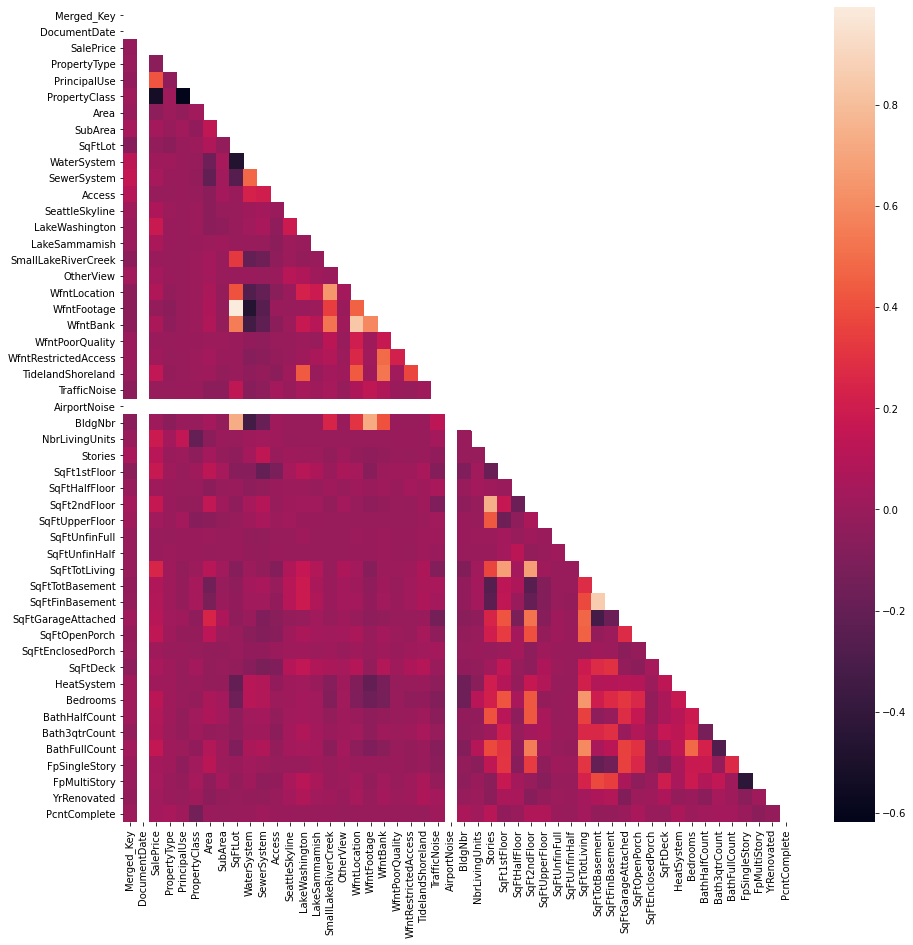

In [19]:
# create heatmap for selected data
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig1, ax1 = plt.subplots(figsize=(15,15))
sns.heatmap(corr,mask=mask, ax=ax1)

In [20]:
# sns.pairplot(df_strong_corr.sample(n=100))

In [21]:
df_merged.columns

Index(['Merged_Key', 'DocumentDate', 'SalePrice', 'PropertyType',
       'PrincipalUse', 'PropertyClass', 'PropType', 'Area', 'SubArea',
       'DistrictName', 'SqFtLot', 'WaterSystem', 'SewerSystem', 'Access',
       'SeattleSkyline', 'LakeWashington', 'LakeSammamish',
       'SmallLakeRiverCreek', 'OtherView', 'WfntLocation', 'WfntFootage',
       'WfntBank', 'WfntPoorQuality', 'WfntRestrictedAccess',
       'WfntAccessRights', 'WfntProximityInfluence', 'TidelandShoreland',
       'TrafficNoise', 'AirportNoise', 'PowerLines', 'OtherNuisances',
       'BldgNbr', 'NbrLivingUnits', 'Address', 'BuildingNumber', 'ZipCode',
       'Stories', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf', 'SqFtTotLiving',
       'SqFtTotBasement', 'SqFtFinBasement', 'SqFtGarageAttached',
       'DaylightBasement', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck',
       'HeatSystem', 'Bedrooms', 'BathHalfCount', 'Bath3qtrCount',
       'BathFullCo

In [22]:
noise_cols = ['SalePrice', 'AirportNoise', 'TrafficNoise', 'PowerLines', 'OtherNuisances']

In [23]:
#create dataframe of strongly correlated column
df_noise = df_merged.drop(df_merged.columns.difference(noise_cols), 1, inplace=False).copy()
df_noise

,SalePrice,TrafficNoise,AirportNoise,PowerLines,OtherNuisances
0,560000,0,0,N,N
1,435000,0,0,N,N
2,775000,0,0,N,N
3,648500,0,0,N,N
4,550000,0,0,N,N
...,...,...,...,...,...
30194,850000,0,0,N,N
30195,650000,0,0,N,N
30196,540000,0,0,N,Y
30197,3900,3,0,N,N


In [24]:
for cat in noise_cols:
    if cat != 'SalePrice':
        unique_values = df_merged[cat].unique()
        print(cat, ': ', unique_values)

AirportNoise :  [0]
TrafficNoise :  [0 1 2 3]
PowerLines :  ['N' 'Y']
OtherNuisances :  ['N' 'Y']


In [25]:
# drop airportnoise values, all zero values
df_noise.drop('AirportNoise', axis=1)

# Create df of chosen predictors, n samples
n = 10000
noise_sample = df_noise.sample(n).dropna().copy()

# some chosen predictors are binary-categorical, convert "Y/N" to "1/0"
for pred in noise_sample:
    # convert all numeric values to floats
    try:
        noise_sample[pred] = noise_sample[pred].astype(int)
        
    # if value is non-numeric, convert to numeric
    except:
        for i in range(len(noise_sample[pred])):
            
            if str(noise_sample[pred].iloc[i]) == 'Y':
                noise_sample[pred].iloc[i] = 1
            
            elif str(noise_sample[pred].iloc[i]) == 'N':
                noise_sample[pred].iloc[i] = 0
            
            else:
                print('Value unaccounted for.')
                
# get saleprice samples
target = noise_sample.SalePrice.copy()

# preds = noise_sample.drop('SalePrice', axis=1, inplace=False)

C:\Users\samjd\anaconda3\envs\oy-env\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [26]:
noise_sample.head()

,SalePrice,TrafficNoise,AirportNoise,PowerLines,OtherNuisances
27861,464950,0,0,0,0
26294,2000000,0,0,0,0
24731,293000,0,0,0,0
19507,799950,0,0,0,0
23006,550000,0,0,0,0


In [27]:
# noise_sample.TrafficNoise = noise_sample.TrafficNoise/3

In [28]:
# sales = noise_sample['SalePrice']
# airport = noise_sample['AirportNoise']
# noise_sample.drop(['SalePrice','AirportNoise'], axis=1, inplace=True)
# noise_sample.insert(3,'AirportNoise', airport)
# noise_sample.insert(4,'SalePrice', sales)

In [29]:
noise_sample.OtherNuisances.value_counts()

0    9662
1     338
Name: OtherNuisances, dtype: int64

In [30]:
noise_sample.PowerLines.value_counts()

0    9909
1      91
Name: PowerLines, dtype: int64

In [31]:
noise_sample.TrafficNoise.value_counts()

0    8552
1     826
2     520
3     102
Name: TrafficNoise, dtype: int64

In [32]:
noise_sample.SalePrice.isna().sum()

0

In [33]:
# noise_sample.AirportNoise.value_counts()

In [34]:
noise_sample.drop('AirportNoise', axis=1, inplace=True)

In [35]:
list(noise_sample)

['SalePrice', 'TrafficNoise', 'PowerLines', 'OtherNuisances']

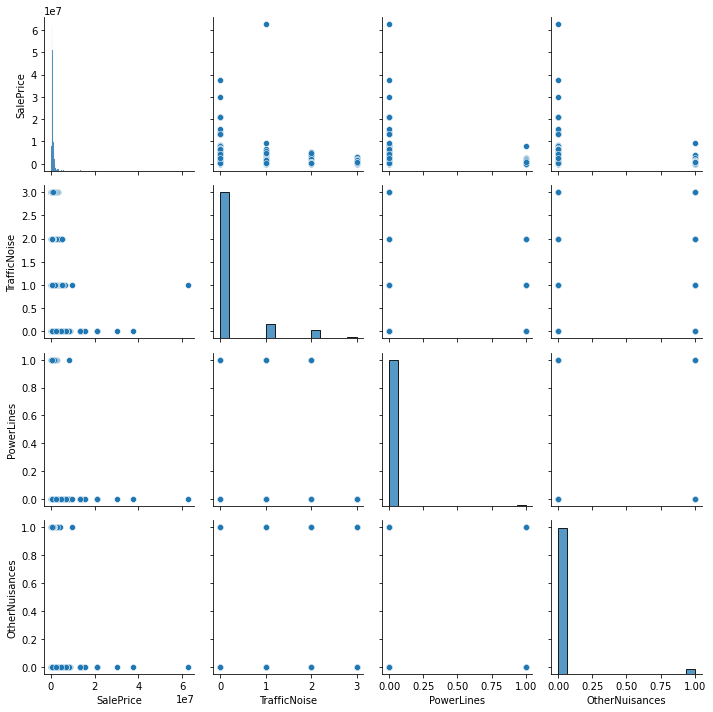

In [36]:
noise_plot = sns.pairplot(noise_sample)
plt.tight_layout()

In [37]:
# # use OneHotEncoder to separate "regions," a categorial variables
# ohe = OneHotEncoder(drop='first', sparse=False)
# df_districtname = pd.DataFrame(ohe.fit_transform(df_merged[['DistrictName']]))
# df_districtname.columns = list(ohe.get_feature_names())
# df_districtname.index = df_merged.index #double check indicies
# df_districtname

,x0_AUBURN,x0_BEAUX ARTS,x0_BELLEVUE,x0_BLACK DIAMOND,x0_BOTHELL,x0_BURIEN,x0_CARNATION,x0_CLYDE HILL,x0_COVINGTON,x0_DES MOINES,...,x0_RENTON,x0_SAMMAMISH,x0_SEATTLE,x0_SHORELINE,x0_SKYKOMISH,x0_SNOQUALMIE,x0_SeaTac,x0_TUKWILA,x0_WOODINVILLE,x0_YARROW POINT
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# ohe.__dict__

{'categories': 'auto',
 'sparse': False,
 'dtype': numpy.float64,
 'handle_unknown': 'error',
 'drop': 'first',
 'categories_': [array(['ALGONA', 'AUBURN', 'BEAUX ARTS', 'BELLEVUE', 'BLACK DIAMOND',
         'BOTHELL', 'BURIEN', 'CARNATION', 'CLYDE HILL', 'COVINGTON',
         'DES MOINES', 'DUVALL', 'ENUMCLAW', 'FEDERAL WAY', 'HUNTS POINT',
         'ISSAQUAH', 'KENMORE', 'KENT', 'KING COUNTY', 'KIRKLAND',
         'LAKE FOREST PARK', 'MAPLE VALLEY', 'MEDINA', 'MERCER ISLAND',
         'MILTON', 'NEWCASTLE', 'NORMANDY PARK', 'NORTH BEND', 'PACIFIC',
         'REDMOND', 'RENTON', 'SAMMAMISH', 'SEATTLE', 'SHORELINE',
         'SKYKOMISH', 'SNOQUALMIE', 'SeaTac', 'TUKWILA', 'WOODINVILLE',
         'YARROW POINT'], dtype=object)],
 'drop_idx_': array([0], dtype=object)}

In [39]:
# ohe.get_feature_names()

array(['x0_AUBURN', 'x0_BEAUX ARTS', 'x0_BELLEVUE', 'x0_BLACK DIAMOND',
       'x0_BOTHELL', 'x0_BURIEN', 'x0_CARNATION', 'x0_CLYDE HILL',
       'x0_COVINGTON', 'x0_DES MOINES', 'x0_DUVALL', 'x0_ENUMCLAW',
       'x0_FEDERAL WAY', 'x0_HUNTS POINT', 'x0_ISSAQUAH', 'x0_KENMORE',
       'x0_KENT', 'x0_KING COUNTY', 'x0_KIRKLAND', 'x0_LAKE FOREST PARK',
       'x0_MAPLE VALLEY', 'x0_MEDINA', 'x0_MERCER ISLAND', 'x0_MILTON',
       'x0_NEWCASTLE', 'x0_NORMANDY PARK', 'x0_NORTH BEND', 'x0_PACIFIC',
       'x0_REDMOND', 'x0_RENTON', 'x0_SAMMAMISH', 'x0_SEATTLE',
       'x0_SHORELINE', 'x0_SKYKOMISH', 'x0_SNOQUALMIE', 'x0_SeaTac',
       'x0_TUKWILA', 'x0_WOODINVILLE', 'x0_YARROW POINT'], dtype=object)

In [40]:
# Use ohe to analyze Traffic Noise Nuisance
ohe = OneHotEncoder(drop='first', sparse=False)
df_trafficnoise = pd.DataFrame(ohe.fit_transform(df_merged[['TrafficNoise']]))
df_trafficnoise.columns = list(ohe.get_feature_names())
df_trafficnoise.index = df_merged.index
df_trafficnoise.to_dict()

{'x0_1': {0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 0.0,
  4: 0.0,
  5: 1.0,
  6: 0.0,
  7: 0.0,
  8: 1.0,
  9: 0.0,
  10: 0.0,
  11: 0.0,
  12: 0.0,
  13: 0.0,
  14: 0.0,
  15: 0.0,
  16: 0.0,
  17: 0.0,
  18: 0.0,
  19: 0.0,
  20: 0.0,
  21: 0.0,
  22: 0.0,
  23: 0.0,
  24: 0.0,
  25: 0.0,
  26: 0.0,
  27: 0.0,
  28: 0.0,
  29: 0.0,
  30: 1.0,
  31: 0.0,
  32: 0.0,
  33: 0.0,
  34: 1.0,
  35: 0.0,
  36: 0.0,
  37: 0.0,
  38: 0.0,
  39: 0.0,
  40: 0.0,
  41: 0.0,
  42: 0.0,
  43: 1.0,
  44: 0.0,
  45: 0.0,
  46: 0.0,
  47: 0.0,
  48: 1.0,
  49: 0.0,
  50: 0.0,
  51: 0.0,
  52: 0.0,
  53: 0.0,
  54: 0.0,
  55: 0.0,
  56: 0.0,
  57: 0.0,
  58: 0.0,
  59: 0.0,
  60: 0.0,
  61: 0.0,
  62: 0.0,
  63: 0.0,
  64: 1.0,
  65: 0.0,
  66: 0.0,
  67: 0.0,
  68: 0.0,
  69: 0.0,
  70: 0.0,
  71: 0.0,
  72: 0.0,
  73: 0.0,
  74: 0.0,
  75: 0.0,
  76: 0.0,
  77: 0.0,
  78: 0.0,
  79: 0.0,
  80: 0.0,
  81: 0.0,
  82: 0.0,
  83: 0.0,
  84: 0.0,
  85: 0.0,
  86: 0.0,
  87: 1.0,
  88: 0.0,
  89: 0.0,
  90: 0.0,
 

In [41]:
df_trafficnoise.rename(columns={'x0_1': 'Traffic_Noise_Level_1', 'x0_2': 'Traffic_Noise_Level_2', 'x0_3': 'Traffic_Noise_Level_3'}, inplace=True)

In [42]:
df_trafficnoise

,Traffic_Noise_Level_1,Traffic_Noise_Level_2,Traffic_Noise_Level_3
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
30194,0.0,0.0,0.0
30195,0.0,0.0,0.0
30196,0.0,0.0,0.0
30197,0.0,0.0,1.0


In [43]:
df_trafficnoise.__dict__

{'_is_copy': None,
 '_data': BlockManager
 Items: Index(['Traffic_Noise_Level_1', 'Traffic_Noise_Level_2',
        'Traffic_Noise_Level_3'],
       dtype='object')
 Axis 1: RangeIndex(start=0, stop=30199, step=1)
 FloatBlock: slice(0, 3, 1), 3 x 30199, dtype: float64,
 '_item_cache': {},
 '_attrs': {}}

In [44]:
traffic_noise_dict = df_trafficnoise.to_dict()
traffic_noise_dict

{'Traffic_Noise_Level_1': {0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 0.0,
  4: 0.0,
  5: 1.0,
  6: 0.0,
  7: 0.0,
  8: 1.0,
  9: 0.0,
  10: 0.0,
  11: 0.0,
  12: 0.0,
  13: 0.0,
  14: 0.0,
  15: 0.0,
  16: 0.0,
  17: 0.0,
  18: 0.0,
  19: 0.0,
  20: 0.0,
  21: 0.0,
  22: 0.0,
  23: 0.0,
  24: 0.0,
  25: 0.0,
  26: 0.0,
  27: 0.0,
  28: 0.0,
  29: 0.0,
  30: 1.0,
  31: 0.0,
  32: 0.0,
  33: 0.0,
  34: 1.0,
  35: 0.0,
  36: 0.0,
  37: 0.0,
  38: 0.0,
  39: 0.0,
  40: 0.0,
  41: 0.0,
  42: 0.0,
  43: 1.0,
  44: 0.0,
  45: 0.0,
  46: 0.0,
  47: 0.0,
  48: 1.0,
  49: 0.0,
  50: 0.0,
  51: 0.0,
  52: 0.0,
  53: 0.0,
  54: 0.0,
  55: 0.0,
  56: 0.0,
  57: 0.0,
  58: 0.0,
  59: 0.0,
  60: 0.0,
  61: 0.0,
  62: 0.0,
  63: 0.0,
  64: 1.0,
  65: 0.0,
  66: 0.0,
  67: 0.0,
  68: 0.0,
  69: 0.0,
  70: 0.0,
  71: 0.0,
  72: 0.0,
  73: 0.0,
  74: 0.0,
  75: 0.0,
  76: 0.0,
  77: 0.0,
  78: 0.0,
  79: 0.0,
  80: 0.0,
  81: 0.0,
  82: 0.0,
  83: 0.0,
  84: 0.0,
  85: 0.0,
  86: 0.0,
  87: 1.0,
  88: 0.0,
  89: 

In [45]:
len(traffic_noise_dict)

3

In [46]:
merged_json = df_merged.to_dict()
len(merged_json)

60

In [47]:
for key, value in traffic_noise_dict.items():
    merged_json[key] = value

In [48]:
len(merged_json)

63

In [49]:
df_trafficnoise = pd.DataFrame(merged_json)

In [50]:
df_trafficnoise.shape

(30199, 63)

In [51]:
df_trafficnoise

,Merged_Key,DocumentDate,SalePrice,PropertyType,PrincipalUse,PropertyClass,PropType,Area,SubArea,DistrictName,...,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,YrRenovated,PcntComplete,Traffic_Noise_Level_1,Traffic_Noise_Level_2,Traffic_Noise_Level_3
0,2130430120,2019,560000,3,6,8,R,70.0,2.0,DUVALL,...,0,0,2,1,0,0,0,0.0,0.0,0.0
1,9406520630,2019,435000,11,6,8,R,56.0,3.0,MAPLE VALLEY,...,0,2,1,0,1,0,0,0.0,0.0,0.0
2,6154900010,2019,775000,11,6,8,R,39.0,3.0,SEATTLE,...,0,1,1,1,0,0,0,0.0,0.0,0.0
3,3470500040,2019,648500,11,6,8,R,56.0,3.0,MAPLE VALLEY,...,1,0,2,1,0,0,0,0.0,0.0,0.0
4,9376300695,2019,550000,3,6,8,R,82.0,11.0,SEATTLE,...,1,0,1,0,1,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30194,6113400046,2019,850000,11,6,8,R,49.0,8.0,NORMANDY PARK,...,1,0,2,1,0,0,0,0.0,0.0,0.0
30195,4254000130,2019,650000,11,6,8,R,70.0,2.0,DUVALL,...,1,0,2,0,1,0,0,0.0,0.0,0.0
30196,3985300006,2019,540000,3,6,8,R,2.0,2.0,SHORELINE,...,0,1,1,1,0,0,0,0.0,0.0,0.0
30197,5727500100,2019,3900,1,6,7,R,3.0,5.0,SHORELINE,...,0,0,1,1,0,0,0,0.0,0.0,1.0


In [52]:
df_ohe_cols = ['SalePrice', 'PowerLines', 'OtherNuisances', 'Traffic_Noise_Level_1', 'Traffic_Noise_Level_2', 'Traffic_Noise_Level_3']

In [53]:
df_ohe_drop_cols = list(list(set(list(df_trafficnoise.columns))-set(df_ohe_cols)))


In [54]:
df_ohe = df_trafficnoise.drop(df_ohe_drop_cols, axis=1)

In [55]:
# drop outliers
df_ohe = df_ohe[df_ohe.SalePrice < 1000000]
df_ohe = df_ohe[df_ohe.SalePrice > 10000]

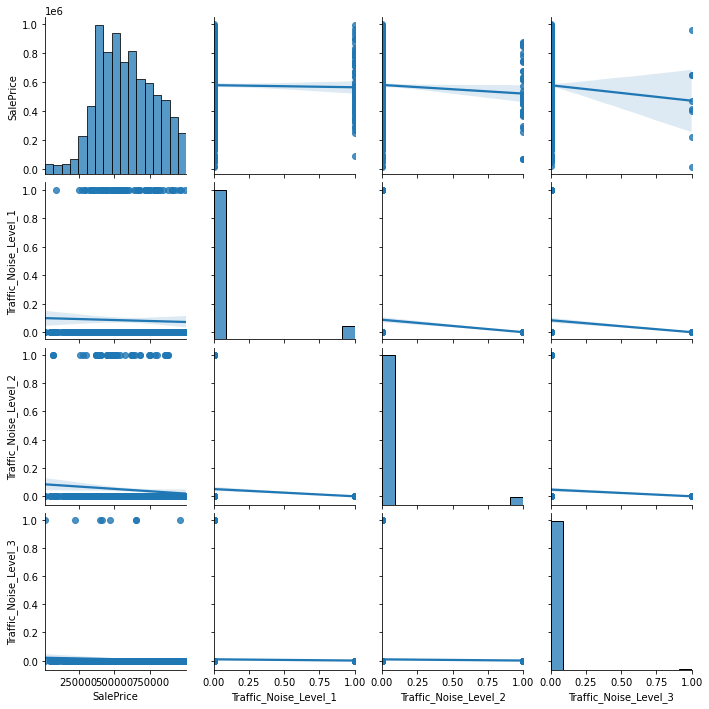

In [56]:
sns.pairplot(df_ohe.sample(1000), kind='reg')

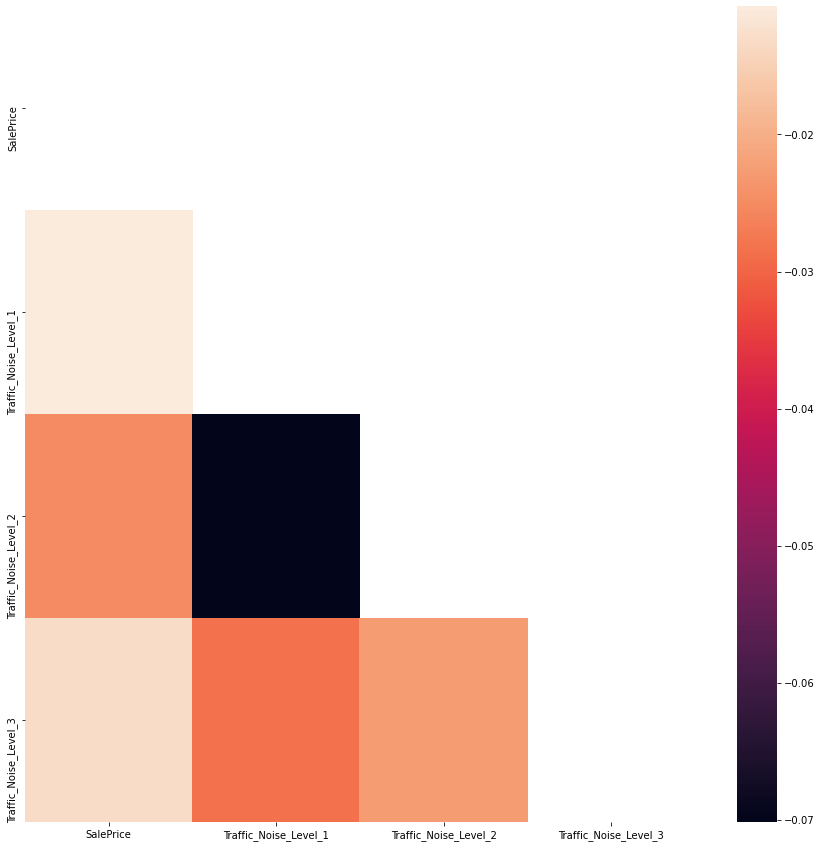

In [57]:
corr = df_ohe.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig1, ax1 = plt.subplots(figsize=(15,15))
sns.heatmap(corr,mask=mask, ax=ax1)

In [58]:
ohe_sample = df_ohe.sample(1000)

In [167]:
noise_pred_list = ['PowerLines', 'OtherNuisances', 'Traffic_Noise_Level_1', 'Traffic_Noise_Level_2', 'Traffic_Noise_Level_3']

for noise_type in noise_pred_list:
    formula = f'SalePrice ~ {noise_type}'
    ols_model = ols(formula=formula, data=ohe_sample)
    print(f'\n\n\nSummary for {noise_type}')
    print(ols_model.fit().summary())




Summary for PowerLines
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.141
Date:                Fri, 02 Oct 2020   Prob (F-statistic):             0.0766
Time:                        12:14:41   Log-Likelihood:                -13643.
No. Observations:                1000   AIC:                         2.729e+04
Df Residuals:                     998   BIC:                         2.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       

In [169]:
formula = 'SalePrice ~ Traffic_Noise_Level_1'
ols_model = ols(formula=formula, data=ohe_sample)
ols_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5494
Date:                Fri, 02 Oct 2020   Prob (F-statistic):              0.459
Time:                        12:16:48   Log-Likelihood:                -13645.
No. Observations:                1000   AIC:                         2.729e+04
Df Residuals:                     998   BIC:                         2.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              5.839e+05   6749.539     86.503      0.000    5.71e+05    5.97e+05
Traffic_Noise_Level_1  1.716e+04   2.32e+04      0.741      0.459   -2.83e+04    6.26e+04
==============================================================================
Omnibus:                       20.570   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.529
Skew:                          -0.043   Prob(JB):                      0.00314
Kurtosis:                       2.481   Cond. No.                         3.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
# create dfs for traffic no traffic
df_traff1_0 = df_ohe[df_ohe.Traffic_Noise_Level_1 == 0]
df_traff1_1 = df_ohe[df_ohe.Traffic_Noise_Level_1 == 1]
df_traff2_0 = df_ohe[df_ohe.Traffic_Noise_Level_2 == 0]
df_traff2_1 = df_ohe[df_ohe.Traffic_Noise_Level_2 == 1]
df_traff3_0 = df_ohe[df_ohe.Traffic_Noise_Level_3 == 0]
df_traff3_1 = df_ohe[df_ohe.Traffic_Noise_Level_3 == 1]

In [181]:
avg_10 = df_traff1_0.SalePrice.mean()
avg_11 = df_traff1_1.SalePrice.mean()
avg_20 = df_traff2_0.SalePrice.mean()
avg_21 = df_traff2_1.SalePrice.mean()
avg_30 = df_traff3_0.SalePrice.mean()
avg_31 = df_traff3_1.SalePrice.mean()

In [203]:
print(avg_11)
print(avg_21)
print(avg_31)

579197.1714137753
565039.3413269385
558664.9768518518


In [206]:
(avg_31-avg_11)/avg_31

-0.036752249402898014

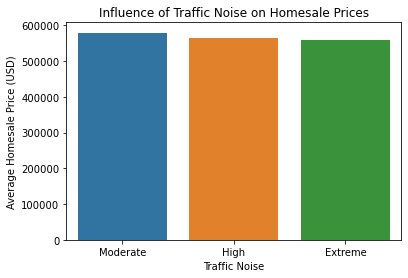

In [201]:
fig, ax = plt.subplots()
ax = sns.barplot(x = ['Moderate', 'High', 'Extreme'], y = [avg_11, avg_21, avg_31])

plt.xlabel('Traffic Noise')
plt.ylabel('Average Homesale Price (USD)')
plt.title('Influence of Traffic Noise on Homesale Prices')
plt.savefig('reports/figures/Traffic Noise Affect.png', transparent=True, bbox_inches = "tight")

In [ ]:
ohe = OneHotEncoder(sparse=False, drop='first')
ohe_wfnt = pd.DataFrame(ohe.fit_transform(newdf[['WfntLocation']]), index=newdf.index) #columns=['Duwamish','Puget Sound','Lake Union','Ship Canal','Lake Washington','Lake Sammamish','Other Lakes','River/Sl